In [242]:
%%time
import os
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
import random
import contractions
import re

from langdetect import detect
import string
from nltk.corpus import stopwords

# Download stopwords list for English if not already downloaded
import nltk
nltk.download('stopwords')

from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources if not already downloaded
nltk.download('punkt')
from wordcloud import WordCloud


CPU times: total: 0 ns
Wall time: 1e+03 µs


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OZGE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OZGE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Utils**

In [243]:
def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

def clean_and_normalize_text(text):
    """
    Cleans and normalizes text by removing unnecessary white spaces,
    normalizing the text to lowercase, and handling common textual issues.

    Args:
    text (str): Input text.

    Returns:
    str: Cleaned and normalized text.
    """

    try:
        text = text.decode('utf-8')
        print("j")
    except AttributeError:
        pass  # Text is already decoded

    text = text.lower()  # Convert the entire text to lowercase
    text = re.sub(r'[{}](?<!-)'.format(re.escape(string.punctuation.replace('-', ''))), '', text)
    text = re.sub(r'\s+', ' ', text)  # Remove unnecessary white spaces

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words]
    text = ' '.join(filtered_text)

    # Fix common textual issues using contractions library
    text = contractions.fix(text)

    return text

def tokenize_text(text):
    """
    Tokenizes the input text.

    Args:
    text (str): Input text.

    Returns:
    list: List of tokens.
    """
    return word_tokenize(text)

### **Data Import**

In [244]:
file_path = os.path.join(parent_dir, 'data', 'raw', 'CU-NLP.csv')
cu_nlp = pd.read_csv(file_path, sep=';', encoding='latin1')
cu_nlp

,no,question1,question2,grade
0,0,"If the question is IR-Based, I will do the fol...",Using semantic analysis methods. We can use ve...,25
1,1,"If the question is IR-Based, I will do the fol...","we should use vector space model. firstly, bin...",25
2,2,"If the question is IR-Based, I will do the fol...","Assume we have a question like "" Why the sky i...",50
3,3,"If the question is IR-Based, I will do the fol...",We can use Vector Space Model that is represen...,25
4,4,"If the question is IR-Based, I will do the fol...",In this corpus we will use sentence segmenting...,50
...,...,...,...,...
166,166,The problem like that can solve by word sense ...,Most important prob. are related to ambiguite...,0
167,167,The problem like that can solve by word sense ...,Lexical WordNet ile zerim. Semantic Syntatic,40
168,168,The problem like that can solve by word sense ...,These can be solved by using the rule based ma...,40
169,169,The problem like that can solve by word sense ...,before translating a word that has many meanin...,100


### **Data Exploration**

In [245]:
cu_nlp.dtypes

no            int64
question1    object
question2    object
grade         int64
dtype: object

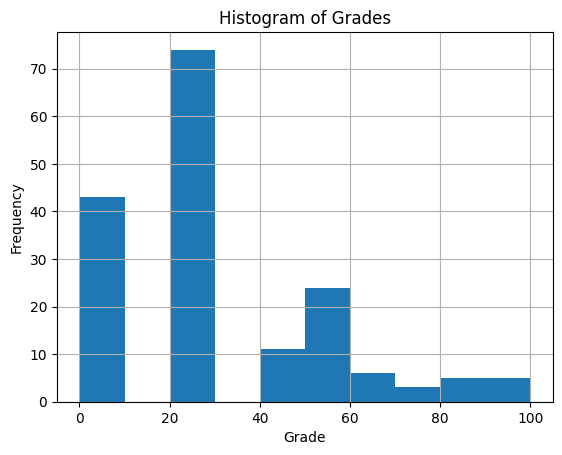

In [246]:
cu_nlp['grade'].hist()

plt.title('Histogram of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')

plt.show()

In [247]:
cu_nlp['question1'].value_counts()

question1
The problem like that can solve by word sense disambiguation. \nTo do that: \nFirstly, I will build or select raw lexical materials such as WordNet, BabelNet, etc. The sentence?s each word has a sense and each sense of the word is a node in WordNet. \nSo, I will look up the nodes to relation. If some of the senses are not close enough to the others on the nodes, then I can say that this is not in a meaningful relationship with the others.                                                                                                                                                                                                                                                                                                                                                                                                                                                                         86
If the question is IR-Based, I will do the following: \nI can assume the question as a q

In [248]:
cu_nlp['question2'].value_counts()

question2
Using semantic analysis methods. We can use vector space model.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   1
There exists a semantic ambiguity due to the same word having more than one meanings. To solve this ambiguity, "bag of nearby words" way can be used which checks for dictionary definitions and appoints the most appropriate translation is given. For the given example, software will check for "fisherman" in dictionary and find "sea" related results therefore "bank" will have th

In [249]:
cu_nlp['lang'] = cu_nlp['question2'].apply(detect_language)
cu_nlp

,no,question1,question2,grade,lang
0,0,"If the question is IR-Based, I will do the fol...",Using semantic analysis methods. We can use ve...,25,en
1,1,"If the question is IR-Based, I will do the fol...","we should use vector space model. firstly, bin...",25,en
2,2,"If the question is IR-Based, I will do the fol...","Assume we have a question like "" Why the sky i...",50,en
3,3,"If the question is IR-Based, I will do the fol...",We can use Vector Space Model that is represen...,25,en
4,4,"If the question is IR-Based, I will do the fol...",In this corpus we will use sentence segmenting...,50,en
...,...,...,...,...,...
166,166,The problem like that can solve by word sense ...,Most important prob. are related to ambiguite...,0,en
167,167,The problem like that can solve by word sense ...,Lexical WordNet ile zerim. Semantic Syntatic,40,en
168,168,The problem like that can solve by word sense ...,These can be solved by using the rule based ma...,40,en
169,169,The problem like that can solve by word sense ...,before translating a word that has many meanin...,100,en


In [250]:
cu_nlp["lang"].value_counts()

lang
en    141
tr     27
pl      1
it      1
de      1
Name: count, dtype: int64

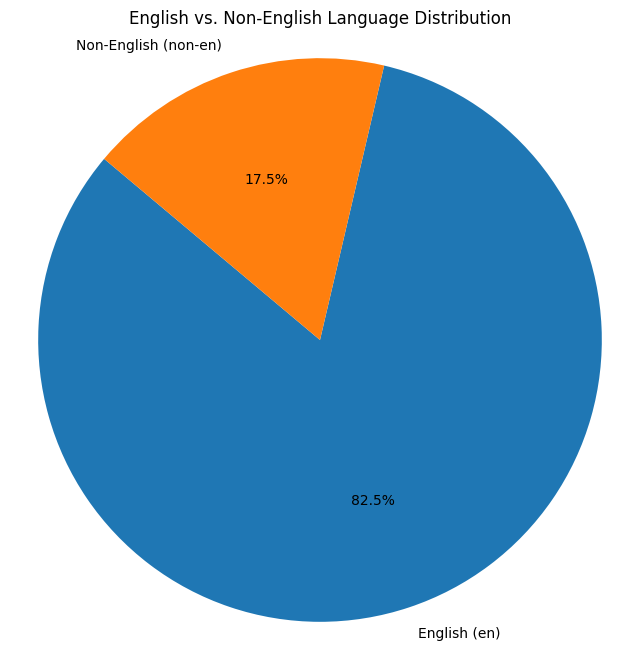

In [251]:
english_count = cu_nlp["lang"].value_counts().get("en", 0)
non_english_count = cu_nlp.shape[0] - english_count

# Create labels and counts for the pie chart
labels = ['English (en)', 'Non-English (non-en)']
counts = [english_count, non_english_count]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('English vs. Non-English Language Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [252]:
turkish_texts = cu_nlp[cu_nlp['lang'] == 'pl']['question2']
for text in turkish_texts:
    print(text)

z


In [253]:
turkish_texts = cu_nlp[cu_nlp['lang'] == 'de']['question2']
for text in turkish_texts:
    print(text)

MAKNENN DE ANLAMADI¦I NOKTA BU OLUYOR.DO¦RU EVRYE DO¦RU SONUCA ULAMASI N CMLENN GELNE, O YANLI EVRLEN KELMENN NCESNDE GELEN KELMELERE BAKACAK.CMLE BAZINDA DA NCEK VE SONRAK CMLEY NCELEYECEK VE BZE KONUNUN NE OLDU¦UNU ANLAYIP, IKARIM DA BULUNACAK.ANCAK BU EKLDE BRAZ DAHA Y SONUCA ULAABLRZ.U ANDA DA BUNU EN Y EKLDE YAPAN GOOGLE'DIR. "GOOGLE NEURAL TRANSLATION"


In [254]:
turkish_texts = cu_nlp[cu_nlp['lang'] == 'it']['question2']
for text in turkish_texts:
    print(text)

Classification


In [255]:
turkish_texts = cu_nlp[cu_nlp['lang'] == 'tr']['question2']
for text in turkish_texts:
    print(text)

I can find with corperoble (karlatrlabilir) corpus. (ayn dnemde ekilmi ayn trde farkl dilde dizi gibi)
Questiondaki her bir kelimenin corpusun iinde geme skl§na bakarm. Her bir kelimenin kendi a§rl§ vardr. Bu kelimeleri vector'e eviririm. Bilgisayarn anlamas iin. Daha sonra vector space modeling uygularm. Vectorlerin aralarndaki aya gre cosine similarity'e bakarm ve benzer olup olmadklarn syleyebilirim. A kldke daha benzerdir.
We can use TREC. TREC yntemi byk corpuslarda ie yarar. Konuyla alakal olarak sorular cevaplar.
What is your name? -> Questionon Answer => My name is Refia. 1 Her soru iinde cevabyla alakal kelime ieriyor.isim sordu , cevapta ' da isim olmal ya da Ne, Nasl,How gibi sorular 2 POS tag tekni§iyle trne gre bakabiliriz ama ilk yntem olmazsa. Mesela ka yandasn? Cevap sfat olmal de§il mi ? "18" . byle yazsada cevap kabul edebiliriz . 3 (Saysal veri olacak eklinde . ) Da§n uzunlu§u ne kadar ? 18 m. ( cev

### **Data Preprocessing**

Let's drop non-english answers

In [256]:
cu_nlp = cu_nlp[cu_nlp['lang'] == 'en'].reset_index(drop=True)
cu_nlp

,no,question1,question2,grade,lang
0,0,"If the question is IR-Based, I will do the fol...",Using semantic analysis methods. We can use ve...,25,en
1,1,"If the question is IR-Based, I will do the fol...","we should use vector space model. firstly, bin...",25,en
2,2,"If the question is IR-Based, I will do the fol...","Assume we have a question like "" Why the sky i...",50,en
3,3,"If the question is IR-Based, I will do the fol...",We can use Vector Space Model that is represen...,25,en
4,4,"If the question is IR-Based, I will do the fol...",In this corpus we will use sentence segmenting...,50,en
...,...,...,...,...,...
136,166,The problem like that can solve by word sense ...,Most important prob. are related to ambiguite...,0,en
137,167,The problem like that can solve by word sense ...,Lexical WordNet ile zerim. Semantic Syntatic,40,en
138,168,The problem like that can solve by word sense ...,These can be solved by using the rule based ma...,40,en
139,169,The problem like that can solve by word sense ...,before translating a word that has many meanin...,100,en


Apply cleaning function
- Converts the entire text to lowercase.
- Removes unnecessary white spaces.
- Removes symbols such as ".", ",", and "-" (excluding hyphens).
- Removes stopwords from the text.
- Handles common textual issues using the contractions library.

In [257]:
cu_nlp['question1'] = cu_nlp['question1'].apply(clean_and_normalize_text)
cu_nlp['question2'] = cu_nlp['question2'].apply(clean_and_normalize_text)
cu_nlp

,no,question1,question2,grade,lang
0,0,question ir-based following assume question qu...,using semantic analysis methods use vector spa...,25,en
1,1,question ir-based following assume question qu...,use vector space model firstly binary mark eve...,25,en
2,2,question ir-based following assume question qu...,assume question like sky blue calculate two wo...,50,en
3,3,question ir-based following assume question qu...,use vector space model representation words ve...,25,en
4,4,question ir-based following assume question qu...,corpus use sentence segmenting seperate senten...,50,en
...,...,...,...,...,...
136,166,problem like solve word sense disambiguation f...,important prob related ambiguites bank -banka...,0,en
137,167,problem like solve word sense disambiguation f...,lexical wordnet ile zerim semantic syntatic,40,en
138,168,problem like solve word sense disambiguation f...,solved using rule based machine translation in...,40,en
139,169,problem like solve word sense disambiguation f...,translating word many meaning like bank first ...,100,en


In [258]:
cu_nlp['question1'].value_counts()

question1
problem like solve word sense disambiguation firstly build select raw lexical materials wordnet babelnet etc sentences word sense sense word node wordnet look nodes relation senses close enough others nodes say meaningful relationship others                                                                                                                                                                                                                                                                                                                                      72
question ir-based following assume question query large text would segment texts shorter passages like paragraphs need find relevant texts corpus find relatedness would apply one methods tf-idf similarity jaccard index word embeddings etc query passages last need rank relevant passages find related sort passages according - number named entities right type passage - number question words keywords passage - keyword pr

The  occurences won't be changed

In [259]:
samples_with_character = cu_nlp[cu_nlp['question2'].str.contains("", na=False)]

# Print the samples
for sample in samples_with_character['question2']:
    print(sample)

let question niin first check question stem affixes scan corpus decide questions - use niin corpus - text include niin others analysis also draw vector space graph use n-grams formula calculate probabilitys
problem include semantic ambiguity fisherman went bank uzunluk ne kadar artarsa uyumluluk kadar azalr bankfinancial fishermane bankcoastdan daha uzak bu yzden coast seilir
10 local collacation - kelime ifti tarznda alaka var m ona bakarm 2 pos neighborng words - sfat m zarf m isim diye bakarm 3 surnondng bag words - cmle ncesinde konuyla alakal neyden bahsetmi hangi kelime var
need use semantic ambiguites understandwhat word meaning cmlede ne ifade etti§ine kiiye ne hissettirdi§ine baklr e§er kyaslanan kelimecmleler aynysa bir sei am yaplmas problemin giderilmesi gerekletirilebilir
problem lexical ambiguities solve problem using categorized database maybe wordnet beneficial categorized database means lot words includes meaning solution sub-category diff

Tokenization

In [260]:
cu_nlp['q1_tokens'] = cu_nlp['question1'].apply(tokenize_text)
cu_nlp['q2_tokens'] = cu_nlp['question2'].apply(tokenize_text)


In [261]:
cu_nlp.head()

,no,question1,question2,grade,lang,q1_tokens,q2_tokens
0,0,question ir-based following assume question qu...,using semantic analysis methods use vector spa...,25,en,"[question, ir-based, following, assume, questi...","[using, semantic, analysis, methods, use, vect..."
1,1,question ir-based following assume question qu...,use vector space model firstly binary mark eve...,25,en,"[question, ir-based, following, assume, questi...","[use, vector, space, model, firstly, binary, m..."
2,2,question ir-based following assume question qu...,assume question like sky blue calculate two wo...,50,en,"[question, ir-based, following, assume, questi...","[assume, question, like, sky, blue, calculate,..."
3,3,question ir-based following assume question qu...,use vector space model representation words ve...,25,en,"[question, ir-based, following, assume, questi...","[use, vector, space, model, representation, wo..."
4,4,question ir-based following assume question qu...,corpus use sentence segmenting seperate senten...,50,en,"[question, ir-based, following, assume, questi...","[corpus, use, sentence, segmenting, seperate, ..."


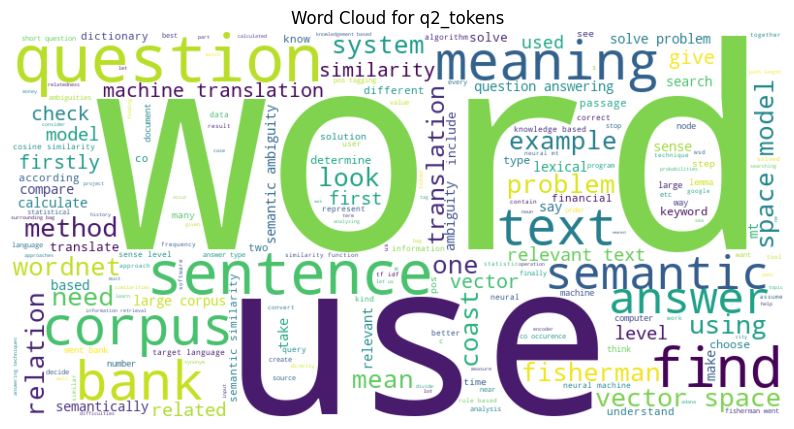

In [263]:
all_tokens = [token for sublist in cu_nlp['q2_tokens'] for token in sublist]

# Convert the list of tokens into a space-separated string
text = ' '.join(all_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for q2_tokens')
plt.axis('off')  # Turn off axis
plt.show()

Save

In [264]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
file_path = os.path.join(parent_dir, 'data', 'processed', 'processed_cu_nlp.csv')

cu_nlp.to_csv(file_path)